# Data Analysis

MMA (Mixed Martial Arts) is a sport that relies heavily on its individual stars to generate revenue. Recognizing the importance of stars also means recognizing the importance of scouting stars. This task is easier said than done, as many prospects go on to become “busts,” or fighters who failed to reach their superstardom potential.

This project aims at using Python, Pandas, and Seaborn to provide insights into common superstar traits, comparing these traits to the average fighter, and producing a “Superstar Calculator” which intakes a fighter’s stats and outputs a “Superstar Score” indicating their potential.

The dataset used in this project is titled “Ultimate UFC Dataset” on Kaggle. It is based on all UFC fighter statistics from 2010 to 2024. The dataset includes over 3,000 UFC fighters, each with stats ranging from physical attributes (height, reach, etc.) to in-fight records (longest win streak, wins by submission, etc.). Data wrangling for this dataset requires the transformation of a per-fight index to a per-fighter index and involved the creation of a subset table called “superstars” for later comparisons.

The results from the analysis of the data revealed that superstars tended to have long reaches, long winning streaks, and high finishing rates. When comparing these commonalities with the average UFC fighter, it was clear to see that superstars easily surpassed benchmark fighters in all three categories. The “Superstar Score” was created and used on the dataset and several specific fighters to display its credibility.

These insights and tools can be used to help MMA promotions find talent using quantitative analysis, allowing them to filter through various fighters and corroborate their intuition with what the numbers say. Doing this will lead to an increase in prospect pipeline success rates, leading to revenue-generating superstars.


### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
roster = pd.read_csv(r"C:\Everything related to Python\01 Python Project Datasets\roster.csv")

superstar_fighters = [
'Conor McGregor',
'Khabib Nurmagomedov',
'Jon Jones',
'Alex Pereira',
'Israel Adesanya',
"Sean O'Malley",
'Max Holloway',
'Ronda Rousey',
'Islam Makhachev',
'Charles Oliveira',
'Jorge Masvidal',
'Stipe Miocic',
'Francis Ngannou',
'Dustin Poirier',
'Amanda Nunes',
'Valentina Shevchenko',
'Tony Ferguson',
'Nate Diaz',
'Ilia Topuria',
'Khamzat Chimaev',
'Alexander Volkanovski',
'Paddy Pimblett',
'Daniel Cormier']

superstars = roster[roster['name'].isin(superstar_fighters)]
superstars = superstars.reset_index(drop = True)

# Similarities Among Superstars

## #1. They have long reaches

The "Ape index" is an index which measures how long an individual's arms are compared to their height. The formula is the difference between an individual's wingspan and their height (measured in inches). If the result is positive, it is considered a "long reach." This is useful in the sport of MMA for distance management and applying submission holds.

In [3]:
superstars_ape_i = superstars.assign(ape_index = (superstars['reach_cms'] - superstars['height_cms']) * 0.393701)
superstars_ape_i[['name', 'ape_index']].sort_values('ape_index', ascending = False).head()

,name,ape_index
11,Jon Jones,8.000004
7,Francis Ngannou,7.000004
1,Alexander Volkanovski,5.000003
4,Conor McGregor,5.000003
21,Tony Ferguson,5.000003


All superstars except one (Max Holloway) has a positive ape index.

In [4]:
superstars_ape_i['ape_index'].mean()

np.float64(2.782610198260869)

The average superstar's ape index is 2.78 inches, which means that their reach is longer than their height by an average of 2.78 inches. 

## #2. They've all had long winning streaks

All superstars have had a minimum max win streak of 4 UFC victories, with an average max win streak of about 8 - 9 victories. Winning streaks not only indicate skill level, but create storylines for fighters and allow their "run" to gain momentum and build "hype". 

In [5]:
superstars[['name', 'longest_win_streak']].sort_values('longest_win_streak', ascending = False).head()

,name,longest_win_streak
11,Jon Jones,18
9,Islam Makhachev,13
15,Max Holloway,13
13,Khabib Nurmagomedov,12
1,Alexander Volkanovski,12


In [6]:
superstars['longest_win_streak'].describe()

count    23.000000
mean      8.739130
std       3.732138
min       4.000000
25%       6.000000
50%       7.000000
75%      12.000000
max      18.000000
Name: longest_win_streak, dtype: float64

Boxplot showing the distribution of the longest winning streaks achieved by Superstars

Text(-0.3, 8.0, 'Median: 7.0')

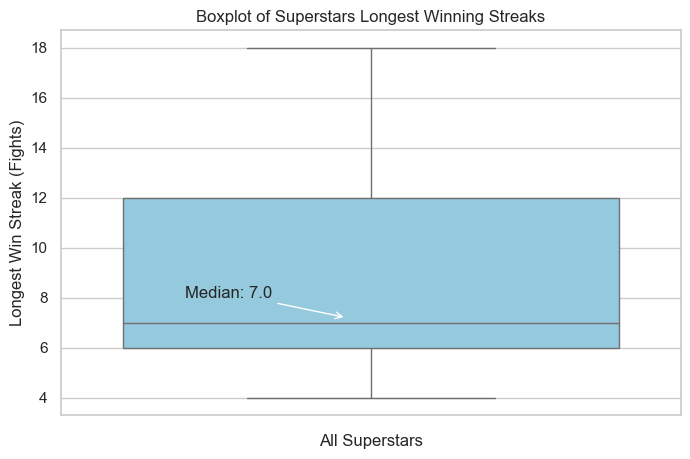

In [7]:
median = superstars['longest_win_streak'].median()

sns.set_theme(style='whitegrid', palette='pastel')
plt.figure(figsize=(8,5))


sns.boxplot(
    data=superstars['longest_win_streak'], 
    color='skyblue')

plt.title('Boxplot of Superstars Longest Winning Streaks')
plt.ylabel('Longest Win Streak (Fights)')
plt.xlabel('All Superstars')

plt.annotate(f'Median: {median}',xy=(0,median),xytext=(-0.3, median + 1),arrowprops={'arrowstyle':'->','shrinkB':20})

The boxplot shows the interquartile range in blue, spanning from 6 to 12 wins. Outliers range from 4 wins to 18 wins. The plot shows a slightly upward skew, meaning select fighters with longer win streaks are stretching the data upwards. The median win streak in the middle of the data is 7 wins.

## #3. They win fights by stoppage

Winning a fight by stoppage consists of winning by either a knockout (KO), techincal knockout (TKO), or submission. These forms of victory provide a level of finality to a win and create "highlights" for the fighter. Superstars are winning fights by stoppage around 66% of the time on average.

In [8]:
wins_by_finish = superstars['wins_by_submission'] + superstars['wins_by_ko'] + superstars['wins_by_tko_doctor_stoppage']
superstar_stoppage = superstars.assign(finish_rate = wins_by_finish / superstars['wins'])
superstar_stoppage[['name', 'finish_rate']].sort_values('finish_rate', ascending = False).head()

,name,finish_rate
7,Francis Ngannou,1.000000
18,Ronda Rousey,1.000000
3,Charles Oliveira,0.909091
4,Conor McGregor,0.800000
16,Nate Diaz,0.789474


In [9]:
superstar_stoppage['finish_rate'].describe()

count    23.000000
mean      0.665296
std       0.167602
min       0.384615
25%       0.557359
50%       0.642857
75%       0.741667
max       1.000000
Name: finish_rate, dtype: float64

Barplot showing the top five fighters by finishing rate in the "Superstar" category

Text(0.85, 3.3, 'Finish Rate: 80%')

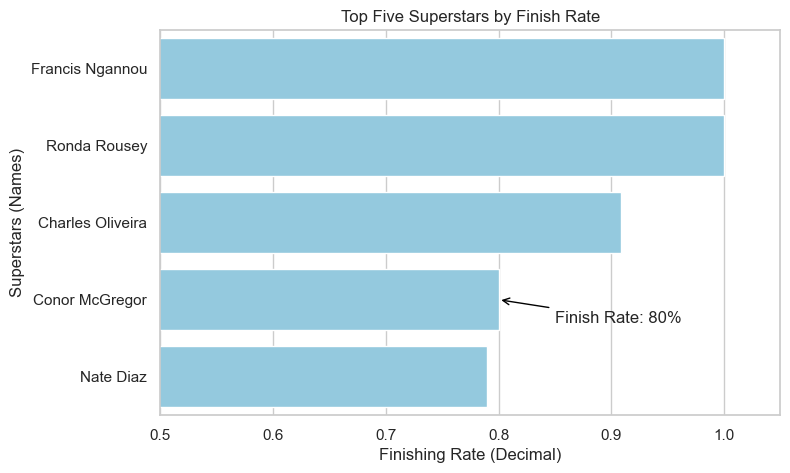

In [10]:
sup_stop_top = superstar_stoppage[['name', 'finish_rate']].sort_values('finish_rate', ascending = False).head()

plt.figure(figsize=(8,5))

sns.barplot(
    data=sup_stop_top, 
    y='name', 
    x='finish_rate', 
    color= 'skyblue')

plt.title('Top Five Superstars by Finish Rate')
plt.xlabel('Finishing Rate (Decimal)')
plt.ylabel('Superstars (Names)')
plt.xlim(.5, None)

plt.annotate('Finish Rate: 80%',xy=(.8,3),xytext=(.85,3.3),arrowprops={'arrowstyle':'->', 'color':'black'})

Francis Ngannou and Ronda Rousey both have 100% finishing rates, meaning that every win they had was by stoppage. Conor McGregor is the biggest superstar in the sport, and ranked fourth with a finishing rate of 80%.

Scatterplot with a regression line identifying the potential correlation between superstars’ finishing rates and their longest win streaks.

Text(0.5, 0, 'Longest Win Streak (Fights)')

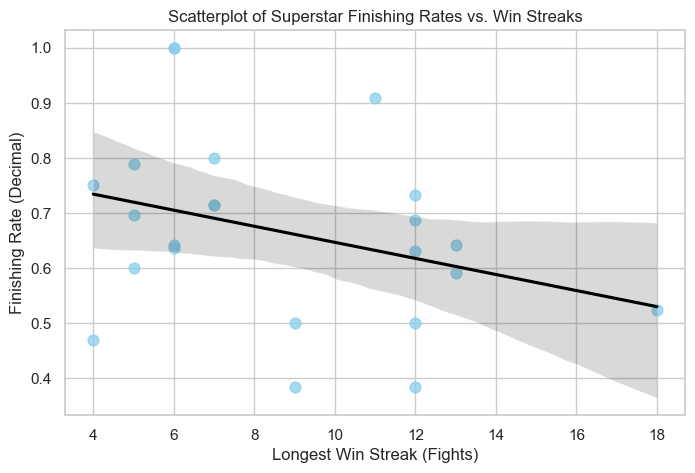

In [11]:
star_correlations = superstar_stoppage[['name','longest_win_streak', 'finish_rate']].sort_values('finish_rate', ascending = False)

plt.figure(figsize=(8,5))

sns.regplot(
    data=star_correlations, 
    x='longest_win_streak', 
    y='finish_rate', 
    scatter_kws ={'color': 'skyblue', 'alpha':.75,'s': 60},
    line_kws={'color': 'black'}
    )

plt.title('Scatterplot of Superstar Finishing Rates vs. Win Streaks')
plt.ylabel('Finishing Rate (Decimal)')
plt.xlabel('Longest Win Streak (Fights)')

The scatterplot shows that there is little evidence of a positive correlation between the two variables. The regression line also supports this fact and even shows a slight negative correlation between the two variables. This shows that the variables are independent, measuring different attributes of a superstar. These variables would be complementary inputs for a "Superstar" function because of their distinguished areas of focus.

# How superstars differ from the normal UFC fighter

Adjusting schema alignment in both the roster and superstars tables for comparison. This involves adding relevant calculated columns related to the ape index & finish rate.  

In [12]:
roster_comparison = roster.assign(ape_index = (roster['reach_cms'] - roster['height_cms']) * 0.393701)

roster_comparison['finish_wins'] = roster_comparison['wins_by_submission'] + roster_comparison['wins_by_ko'] + roster_comparison['wins_by_tko_doctor_stoppage']

roster_comparison['finish_rate'] = roster_comparison['finish_wins'] / roster_comparison['wins']

In [13]:
superstars_comparison = superstars.assign(ape_index = (roster['reach_cms'] - superstars['height_cms']) * 0.393701)

superstars_finish_wins = superstars_comparison['wins_by_submission'] + superstars_comparison['wins_by_ko'] + superstars_comparison['wins_by_tko_doctor_stoppage']
superstars_comparison['finish_rate'] = superstars_finish_wins / superstars_comparison['wins']

Joining both modified roster and superstars table to compare descriptive statistics between the qualities that are consistent in superstars (long reach, long winning streaks, and high finishing rates).

In [14]:
roster_join = roster_comparison[['ape_index', 'longest_win_streak', 'finish_rate']].describe()

superstars_join = superstars_comparison[['ape_index', 'longest_win_streak', 'finish_rate']].describe()

In [15]:
comparison_table = roster_join.join(superstars_join, lsuffix='_roster', rsuffix='_superstars')

comparison_table

,ape_index_roster,longest_win_streak_roster,finish_rate_roster,ape_index_superstars,longest_win_streak_superstars,finish_rate_superstars
count,2112.000000,2112.000000,1613.000000,23.000000,23.000000,23.000000
mean,1.663292,2.080966,0.512741,3.002056,8.739130,0.665296
std,1.947837,2.142834,0.353697,5.080749,3.732138,0.167602
min,-5.188979,0.000000,0.000000,-7.000004,4.000000,0.384615
25%,0.000000,1.000000,0.250000,0.000000,6.000000,0.557359
50%,2.000001,2.000000,0.500000,2.047245,7.000000,0.642857
75%,3.000002,3.000000,0.800000,7.500004,12.000000,0.741667
max,9.000005,18.000000,1.000000,11.000006,18.000000,1.000000


The above table indicates that superstars excel in the three categories relative to their peers in the UFC.
The average superstar has:

- An ape index roughly double that of a typical UFC fighter
- A four to five times longer "longest win streak"
- A finishing rate of 66%, whereas the whole roster has an average of around 50%


Overlayed density plot comparing the finishing rates of the entire roster and superstars

Text(0.8, 2.1, 'Finish Rate: 66%')

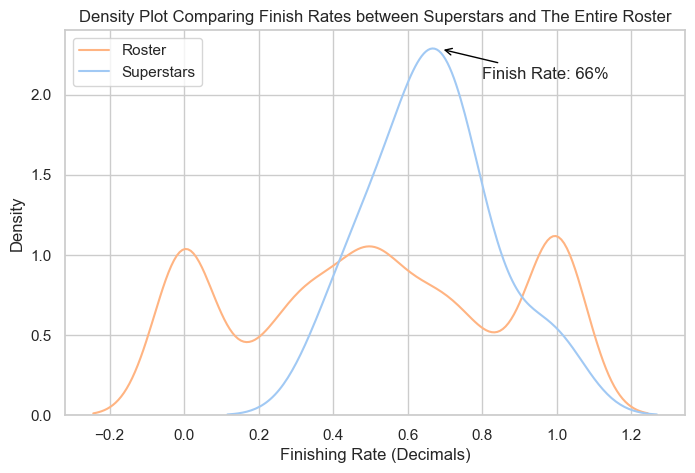

In [16]:
roster_star_boolean = roster_comparison.assign(superstar=lambda x: x['name'].isin(superstar_fighters))

plt.figure(figsize=(8,5))

sns.kdeplot(data=roster_star_boolean, x='finish_rate', hue='superstar', hue_order=[True, False], common_norm=False)

plt.title('Density Plot Comparing Finish Rates between Superstars and The Entire Roster')
plt.xlabel('Finishing Rate (Decimals)')
plt.ylabel('Density')
plt.legend(title='', labels=['Roster', 'Superstars', ])

plt.annotate('Finish Rate: 66%', xy=(0.66,2.3), xytext=(.8,2.1),arrowprops={'arrowstyle':'->','shrinkB':10,'color':'black'})


The above plot normalizes each respective dataset individually to allow for a fair comparison between the two groups. The entire UFC roster shows a large variation in finishing rates, whereas the finishing rates of superstars are very concentrated around the 60–70% range. This suggests that superstars are more consistent with their finishing rates.

# Creating the "Superstar Score"

Create a function outputting a "superstar score" given a particular fighters current stats. 
A good benchmark score for a fighter to show potential as a superstar is to have a triple digit score (100+).


In [17]:
def superstar_score(height_cms, reach_cms, longest_win_streak, wins, finishes):
    """ 
    Function: 
    Given information on fighters, returns score used for measuring superstar potential. A score over 100 means there is potential.
    Reach accounts for 10% of the score, while the longest win streak and finish rate both account for 40% each. 

    Parameters: 
    height_cm - fighters height, measured in centimeters
    reach_cm - fighters reach, measured in centimeters
    longest_win_streak - integer of the fighters highest consecutive number of wins in their career
    wins - integer of fighters total wins
    finishes - integer of fighters total number of wins ending in knockout, technical-knockout, or submission

    """
    ape_index = (reach_cms - height_cms) / 0.393701
    if wins != 0:
        finishing_rate = finishes / wins
    else:
        finishing_rate = 0
    if ape_index <= 0:
        reach_score = 0
    else:
        reach_score = ape_index * 3.2
        
    win_streak_score = longest_win_streak * 4.6
    finish_score = finishing_rate * 60.12
    score = reach_score + win_streak_score + finish_score
    return score

A couple examples using this function:

Fighter #1: Adrian Yanez
- height_cms = 170.18
- reach_cms = 177.80
- longest_win_streak = 6
- wins = 6
- finishes = 5

In [18]:
print(superstar_score(170.18, 177.8, 6, 6, 5))

139.6353265549237


Adrian Yanez has a superstar score of 139.6. A very promising superstar score.

Fighter #2: Darren Elkins
- height_cms = 177.8
- reach_cms = 180.34
- longest_win_streak = 6
- wins = 18
- finishes = 7

In [19]:
print(superstar_score(177.8, 180.34, 6, 18, 7))

71.62510885164114


Darren Elkins has a score of 71.63. Not a promising superstar score.

## Visualizing the Superstar Score 

Create a new table which gives every fighter on the UFC roster their "Superstar Score"

In [20]:
roster_ss_score = roster_comparison.assign(
    star_score= lambda x: x.apply(
        lambda row: superstar_score(
            row['height_cms'], 
            row['reach_cms'], 
            row['longest_win_streak'], 
            row['wins'], 
            row['finish_wins']), 
            axis=1))



Boxplots showing the distribution of fighters "Superstar Score" by weight class

Text(0.5, 0, 'Superstar Score')

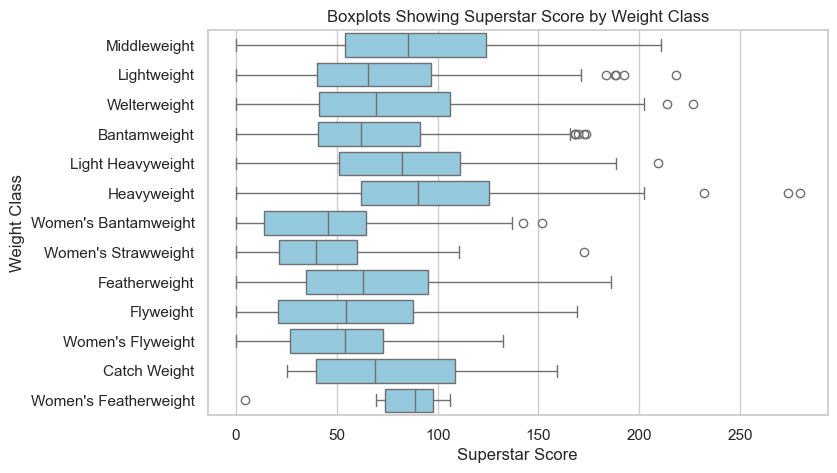

In [21]:
plt.figure(figsize=(8,5))

sns.boxplot(
    data=roster_ss_score, 
    y='weight_class',
    x='star_score',
    color='skyblue')

plt.title("Boxplots Showing Superstar Score by Weight Class")
plt.ylabel('Weight Class')
plt.xlabel('Superstar Score')

This plot not only helps us find the average Superstar Scores per weight class, but also helps us identify the high end outliers in each weight class. This is important to do, as MMA matchmaking is a zero-sum game, and helping one Superstar could be at the expense of another. The UFC should focus on dispersing their stars into different weight classes, therefore creating a system where multiple can thrive at the same time. 

## Applicable Use

This "Superstar Score" function is meant to serve as a single factor in determining superstar potential. This number is best used in conjunction with other qualitative measures in fighter assessment. Using this function on regional prospects where there is a "hunch" for superstar potential can allow scouts to have quantitative evidence in support of their gut instincts.